<a href="https://colab.research.google.com/github/krish0195/ml_end_to-_end/blob/master/xg_boost_running.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Use to import pandas
import pandas as pd
#Use to import the file into google Colab drive
from google.colab import files
#Use to import io, which opens the file from the Colab drive
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#SparseNormalizer, XGBoostClassifier

In [ ]:
# This will open a widget when run that will enable you to browse the files on your local storage drive.
# the excel file after reshaping each to 1000 records:
uploaded = files.upload()

Saving Final_df.csv to Final_df.csv


In [ ]:

df_fulldata=pd.read_csv('Final_df.csv')
df_fulldata.head()

,Sr No,time,stern_mast_r,cleid_mas_r,cleid_occ_r,long_cap_sklc4_r,long_col_c1thx_r,long_col_c1c5_r,long_col_c5thx_r,trap_acr_r,splen_cerv_c3thx_r,semi_cap_sklc5_r,levator_scap_r,longissi_cap_sklc6_r,longissi_cerv_c4thx_r,iliocost_cerv_c5rib_r,rectcap_post_maj_r,rectcap_post_min_r,obl_cap_sup_r,obl_cap_inf_r,digastric_post_r,digastric_ant_r,Geniohyoid_r,Mylohyoid_Post_r,Mylohyoid_Ant_r,Stylohyoid_Lat_r,Stylohyoid_Med_r,Sterno_hyoid_r,SternoThyroid_r,Omo_hyoid_r,stern_mast_l,cleid_mast_l,cleid_occ_l,long_cap_sklc4_l,long_col_c1thx_l,long_col_c1c5_l,long_col_c5thx_l,trap_acr_l,splen_cerv_c3thx_l,semi_cap_sklc5_l,levator_scap_l,longissi_cap_sklc6_l,longissi_cerv_c4thx_l,iliocost_cerv_c5rib_l,rectcap_post_maj_l,rectcap_post_min_l,obl_cap_sup_l,obl_cap_inf_l,digastric_post_l,digastric_ant_l,Geniohyoid_l,Mylohyoid_Post_l,Mylohyoid_Ant_l,Stylohyoid_Lat_l,Stylohyoid_Med_l,Sterno_hyoid_l,SternoThyroid_l,Omo_hyoid_l,Direction,Subject
0,1,0.000000,15.224083,7.329898,5.640508,4.864611,1.441753,1.441705,1.432433,63.239589,7.486504,8.959424,11.147425,4.716546,3.028918,3.019896,4.552728,2.566827,5.430573,6.848087,6.066963,3.807231,5.135560,2.806027,8.418082,1.028819,1.028841,3.070743,3.441343,3.970793,15.224083,7.329898,5.640508,4.864611,1.441753,1.441705,2.096794,63.239589,7.486504,8.959424,11.147425,4.716546,3.028918,3.019896,4.552728,2.566827,5.430573,6.848087,6.066963,3.807231,5.135560,2.806027,8.418082,1.028819,1.028841,3.070743,3.192654,3.836298,Flexion_relaxed,1
1,2,0.000233,15.294100,7.383138,5.668919,4.845135,1.443353,1.443358,1.431789,64.153269,7.530222,8.956275,11.170654,4.683953,3.073223,3.091184,4.642744,2.599317,5.444150,6.846499,6.086064,3.634936,4.813947,2.750926,7.707358,1.026095,1.025724,3.120961,3.490565,4.057301,15.293540,7.382788,5.668730,4.846819,1.443342,1.443731,2.095949,64.152866,7.531798,8.957287,11.171136,4.683851,3.072262,3.090338,4.642719,2.599317,5.444150,6.846402,6.077234,3.634936,4.813947,2.750926,7.707358,1.026774,1.026485,3.120761,3.248781,3.929045,Flexion_relaxed,1
2,3,0.000552,15.556113,7.572584,5.777622,4.761932,1.450133,1.450281,1.428901,67.604876,7.702682,8.941606,11.254600,4.555209,3.242777,3.359133,5.006113,2.736847,5.501278,6.839891,6.165724,2.991366,3.735757,2.528699,5.437963,1.014227,1.012177,3.321134,3.685095,4.407076,15.553191,7.570818,5.776619,4.771020,1.450073,1.452298,2.092197,67.602681,7.711268,8.946992,11.256895,4.554699,3.237829,3.354735,5.005968,2.736847,5.501278,6.839355,6.117054,2.991366,3.735757,2.528699,5.437963,1.017676,1.016033,3.320046,3.472213,4.304494,Flexion_relaxed,1
3,4,0.001190,16.394531,8.130792,6.137115,4.464246,1.474171,1.474061,1.416581,79.355084,8.320058,8.868740,11.524764,4.150429,3.788589,4.222563,6.270702,3.235264,5.703099,6.815741,6.473187,1.331174,1.583291,1.829167,1.545704,0.969852,0.961785,4.002108,4.336987,5.627499,16.382780,8.124059,6.132962,4.502724,1.473906,1.482770,2.076518,79.345254,8.357124,8.891229,11.532705,4.148542,3.768644,4.204224,6.269907,3.235264,5.703099,6.813077,6.255273,1.331174,1.583291,1.829167,1.545704,0.982653,0.976040,3.996953,4.228476,5.611956,Flexion_relaxed,1
4,5,0.001578,17.006705,8.509748,6.406233,4.245388,1.492229,1.491614,1.405159,88.408598,8.826196,8.788806,11.733791,3.885071,4.179901,4.857880,7.244183,3.623083,5.854482,6.796429,6.754502,0.578812,0.839202,1.391145,0.409532,0.934700,0.922107,4.488563,4.793725,6.529852,16.987830,8.499200,6.399463,4.308705,1.491774,1.506215,2.062260,88.391410,8.888049,8.825851,11.745649,3.882169,4.147357,4.826888,7.242563,3.623083,5.854482,6.791366,6.380686,0.578812,0.839202,1.391145,0.409532,0.956282,0.946078,4.479075,4.762351,6.570300,Flexion_relaxed,1


In [ ]:
df_fulldata.shape

(60000, 57)

In [ ]:
#label encoding of tgt varaible
tgt_map = {    'Flexion_football':0,
               'Flexion_relaxed':1,
               'Flexion_stiffed':2,
               'Lateral_football':3,
               'Lateral_relaxed':4,
               'Lateral_stiffed':5
              }
df_fulldata["Direction"]=df_fulldata.Direction.map(tgt_map)
df_fulldata=df_fulldata.drop(columns=["time","Subject","Sr No"],axis=1)


In [ ]:
x=df_fulldata.drop(columns=['Direction'])
y=df_fulldata['Direction']
df_fulldata['Direction'].value_counts()

1    10000
2    10000
3    10000
4    10000
5    10000
0    10000
Name: Direction, dtype: int64

In [ ]:
#method 2:Feature selection:PCA
#standard before doing PCA for reducing dimensions:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x)
x_scaled = pd.DataFrame(scalar.transform(x),columns=x.columns)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, stratify = y, random_state = 43,shuffle=True)

print("x_train shape is",x_train.shape)
print("y_train shape is",y_train.shape)

print("x_test shape is",x_test.shape)
print("y_test shape is",y_test.shape)

x_train shape is (48000, 56)
y_train shape is (48000,)
x_test shape is (12000, 56)
y_test shape is (12000,)


In [ ]:
#Classification Metrics:

def prediction(x_train,y_train,x_test,y_test,y_train_predict,y_test_predict):

  #Accuracy Check of Train
  train_accuracy = metrics.accuracy_score(y_train,y_train_predict)
  print("The Train Accuracy:",round(train_accuracy,3))

# Accuracy Check of Test
  test_accuracy = metrics.accuracy_score(y_test,y_test_predict)
  print("The Test Accuracy",round(test_accuracy,4))

  return train_accuracy,test_accuracy

In [ ]:
#4) XG Boost calssifier
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(x_train, y_train)
y_train_predict = xgb_classifier.predict(x_train)
y_test_predict = xgb_classifier.predict(x_test)

print("the Train and Test accuracy of XG Boost calssifier ")
XGB_train_accuracy, XGB_test_accuracy=prediction(x_train,y_train,x_test,y_test,y_train_predict,y_test_predict)

the Train and Test accuracy of XG Boost calssifier 
The Train Accuracy: 0.995
The Test Accuracy 0.9838


In [ ]:
#Test Features

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_predict)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_predict,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_predict,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_test_predict,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.983750
Precision: 0.983752
Recall: 0.983750
F1 score: 0.983750


In [ ]:
#train features
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_predict)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, y_train_predict,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, y_train_predict,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, y_train_predict,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.995250
Precision: 0.995257
Recall: 0.995250
F1 score: 0.995251


In [35]:
instance_check=pd.DataFrame()

instance_check["y_test_actual"]=y_test
instance_check["y_test_predict"]=y_test_predict

#label encoding of tgt varaible
tgt_map = {    0:"Flexion_football",
               1:"Flexion_relaxed",
               2:"Flexion_stiffed",
               3:"Lateral_football",
               4:"Lateral_relaxed",
               5:"Lateral_stiffed"
              }
instance_check["y_test_actual"]=instance_check.y_test_actual.map(tgt_map)

instance_check["y_test_predict"]=instance_check.y_test_predict.map(tgt_map)

instance_check.head(10)

,y_test_actual,y_test_predict
51733,Flexion_stiffed,Flexion_stiffed
3193,Flexion_stiffed,Flexion_stiffed
11326,Lateral_relaxed,Lateral_relaxed
44478,Lateral_stiffed,Lateral_stiffed
38612,Lateral_relaxed,Lateral_relaxed
17365,Flexion_football,Flexion_football
3685,Flexion_stiffed,Flexion_stiffed
51855,Flexion_stiffed,Flexion_stiffed
56881,Lateral_stiffed,Lateral_stiffed
46501,Flexion_relaxed,Flexion_relaxed


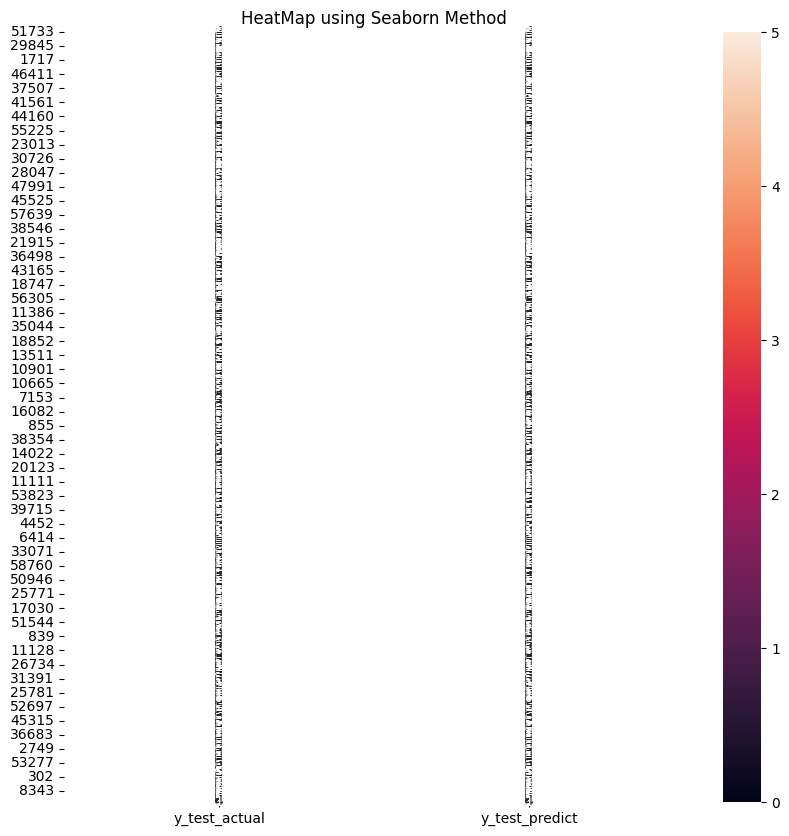

In [37]:

#label encoding of tgt varaible
tgt_map = {    'Flexion_football':0,
               'Flexion_relaxed':1,
               'Flexion_stiffed':2,
               'Lateral_football':3,
               'Lateral_relaxed':4,
               'Lateral_stiffed':5
              }
instance_check["y_test_actual"]=instance_check.y_test_actual.map(tgt_map)
instance_check["y_test_predict"]=instance_check.y_test_predict.map(tgt_map)

plt.figure(figsize=(10,10))
heat_map = sns.heatmap( instance_check, linewidth = 1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

In [ ]:
#APPPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(xgb_classifier,x_train,y_train, cv=5)

accuracies_test= cross_val_score(xgb_classifier,x_test,y_test, cv=5)

In [ ]:
print("Accuracy : {:.2f} %",format(accuracies.mean()*100))
print(accuracies.mean()*100)
print(accuracies.std()*100)

print("test Accuracy : {:.2f} %",format(accuracies.mean()*100))
print(accuracies_test.mean()*100)
print(accuracies_test.std()*100)

Accuracy : {:.2f} % 98.28541666666668
98.28541666666668
0.06705615391429652
test Accuracy : {:.2f} % 98.28541666666668
98.55833333333332
0.16372402253657078


In [ ]:
#instance check

#model.predict_classes(X_test[17:18])



In [ ]:
#Hyperparameter Optimization for Xgboost

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 0 hours 26 minutes and 26.99 seconds.


In [ ]:

random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [ ]:
#classifier=xgboost.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob')

IndentationError: ignored

In [ ]:
#classifier=xgboost.XGBClassifier('min_child_weight': 3,'max_depth': 6,'learning_rate': 0.1,'gamma': 0.3,'colsample_bytree': 0.5)

In [ ]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=5)

In [ ]:
score

In [ ]:

score.mean()

In [ ]:
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(10)

import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(xgb_classifier,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

In [ ]:
check_instance=pd.DataFrame()
check_instance["actual"]=y_test
check_instance["predicted"]=y_test_predict
check_instance.head(10)

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(x_train),
                                              feature_names=x_train.columns,
                                              verbose=True,
                                              class_names=['0','1',"2","3","4","5"],
                                              mode='classification')

In [ ]:
exp = explainer.explain_instance(
    data_row=x_test.iloc[3], ##new data
    predict_fn=xgb_classifier.predict_proba
)
exp.show_in_notebook(show_table=True)

In [ ]:
 #4)CROSS VALIDATION-xgb Classifier

import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
cv_score_xg = cross_val_score(xgb_classifier, x, y, cv=5)
print(cv_score_xg)
mean_accuracy_xg = sum(cv_score_lr)/len(cv_score_xg)
mean_accuracy_xg = mean_accuracy_dt*100
mean_accuracy_xg = round(mean_accuracy_xg, 2)
print(mean_accuracy_xg)

In [ ]:
#mean_accuracy_list
results = pd.DataFrame({
    'Model': ['xgb'],
    'Score': [mean_accuracy_xg]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)